In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

import tensorflow
tensorflow.keras.__version__
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import pandas as pd 
import datetime
import numpy as np

In [71]:
# import csv
df = pd.read_csv("Provider_Info.csv")
# drop columns not included in analysis
df = df.drop(columns=['Federal Provider Number', 'Provider Name', 'Provider Address',
       'Provider City', 'Provider State', 'Provider Zip Code',
       'Provider Phone Number', 'Provider SSA County Code',
       'Provider County Name', 
       'Provider Resides in Hospital', 'Legal Business Name',
       'Date First Approved to Provide Medicare and Medicaid services',
       'Continuing Care Retirement Community', 'Special Focus Status',
       'Most Recent Health Inspection More Than 2 Years Ago',
       'Provider Changed Ownership in Last 12 Months',
       'With a Resident and Family Council',
       'Automatic Sprinkler Systems in All Required Areas', 
       'Overall Rating Footnote', 
       'Health Inspection Rating Footnote',  'QM Rating Footnote',
        'Long-Stay QM Rating Footnote',
       'Short-Stay QM Rating Footnote','Staffing Rating Footnote', 
       'RN Staffing Rating Footnote', 'Reported Staffing Footnote',
       'Physical Therapist Staffing Footnote',
        'Rating Cycle 1 Standard Survey Health Date',
       'Rating Cycle 2 Standard Health Survey Date',
       'Rating Cycle 3 Standard Health Survey Date',
         'Location', 'Processing Date'
       ])
# reconsider encoding some of the dropped columns after initial analysis 
# Drop null columns/rows
df = df.dropna(axis='columns', how='all')
df = df.dropna()
df.tail()

,Ownership Type,Number of Certified Beds,Average Number of Residents Per Day,Provider Type,Cited for Abuse,Overall Rating,Health Inspection Rating,QM Rating,Long-Stay QM Rating,Short-Stay QM Rating,...,Rating Cycle 3 Health Deficiency Score,Rating Cycle 3 Health Revisit Score,Rating Cycle 3 Total Health Score,Total Weighted Health Survey Score,Number of Facility Reported Incidents,Number of Substantiated Complaints,Number of Fines,Total Amount of Fines in Dollars,Number of Payment Denials,Total Number of Penalties
15483,Non profit - Church related,154,128.8,Medicare and Medicaid,False,4.0,3.0,5.0,4.0,5.0,...,20,0,20,35.333,0,3,0,0,0,0
15484,For profit - Corporation,90,75.0,Medicare and Medicaid,False,1.0,2.0,3.0,3.0,3.0,...,52,0,52,71.000,2,3,1,13328,0,1
15486,For profit - Partnership,125,90.4,Medicare and Medicaid,True,1.0,1.0,1.0,1.0,2.0,...,32,0,32,180.000,3,2,0,0,0,0
15487,For profit - Corporation,62,57.4,Medicare and Medicaid,False,1.0,1.0,2.0,2.0,2.0,...,48,0,48,128.000,0,12,1,124335,0,1
15489,Non profit - Corporation,71,65.4,Medicare and Medicaid,False,5.0,5.0,5.0,5.0,5.0,...,0,0,0,8.667,0,0,0,0,0,0


In [72]:
# list(df.columns.values)
df.shape

(12929, 54)

In [73]:
df.to_csv('df_export.csv')

In [74]:
df.columns

Index(['Ownership Type', 'Number of Certified Beds',
       'Average Number of Residents Per Day', 'Provider Type',
       'Cited for Abuse', 'Overall Rating', 'Health Inspection Rating',
       'QM Rating', 'Long-Stay QM Rating', 'Short-Stay QM Rating',
       'Staffing Rating', 'RN Staffing Rating',
       'Reported Nurse Aide Staffing Hours per Resident per Day',
       'Reported LPN Staffing Hours per Resident per Day',
       'Reported RN Staffing Hours per Resident per Day',
       'Reported Licensed Staffing Hours per Resident per Day',
       'Reported Total Nurse Staffing Hours per Resident per Day',
       'Reported Physical Therapist Staffing Hours per Resident Per Day',
       'Case-Mix Nurse Aide Staffing Hours per Resident per Day',
       'Case-Mix LPN Staffing Hours per Resident per Day',
       'Case-Mix RN Staffing Hours per Resident per Day',
       'Case-Mix Total Nurse Staffing Hours per Resident per Day',
       'Adjusted Nurse Aide Staffing Hours per Resident per

In [75]:
#Explore data
df['Overall Rating'].value_counts()

4.0    2877
5.0    2696
2.0    2578
3.0    2393
1.0    2385
Name: Overall Rating, dtype: int64

In [76]:
df.groupby('Overall Rating').mean()

,Number of Certified Beds,Average Number of Residents Per Day,Cited for Abuse,Health Inspection Rating,QM Rating,Long-Stay QM Rating,Short-Stay QM Rating,Staffing Rating,RN Staffing Rating,Reported Nurse Aide Staffing Hours per Resident per Day,...,Rating Cycle 2 Number of Health Revisits,Rating Cycle 2 Health Revisit Score,Rating Cycle 2 Total Health Score,Total Weighted Health Survey Score,Number of Facility Reported Incidents,Number of Substantiated Complaints,Number of Fines,Total Amount of Fines in Dollars,Number of Payment Denials,Total Number of Penalties
Overall Rating,,,,,,,,,,,,,,,,,,,,,
1.0,126.301468,98.706247,0.122013,1.264570,2.548008,2.742138,2.566876,1.955556,1.932075,2.031845,...,1.057023,8.061216,129.200000,128.520006,2.171069,9.646541,1.012998,44715.039413,0.292662,1.305660
2.0,120.679984,96.791932,0.088441,1.845617,3.342901,3.395656,3.291311,2.638867,2.635764,2.187111,...,1.018231,4.275019,84.824282,84.837188,1.889449,6.253685,0.755237,24868.508534,0.128394,0.883631
3.0,115.169662,94.204388,0.036356,2.708316,3.519432,3.529043,3.470539,2.726285,2.716256,2.235587,...,0.959883,0.645215,47.796072,48.390708,1.308399,3.412453,0.402006,8804.463853,0.054325,0.456331
4.0,107.735836,89.031873,0.013208,3.445951,3.808481,3.806743,3.710810,3.191519,3.187000,2.357402,...,0.913799,0.560306,33.183525,33.136489,0.867918,2.013903,0.259298,4586.423705,0.029545,0.288843
5.0,100.284125,84.959050,0.000000,4.245920,4.598665,4.418398,4.433605,3.673591,3.695846,2.522535,...,0.802300,0.161721,21.205119,20.769855,0.554896,1.142433,0.162092,2591.984792,0.012240,0.174332


In [77]:
# df.groupby(['Overall Rating','Number of Certified Beds']).agg({'Overall Rating': 'count'})

In [78]:
#  df.groupby(['Total Weighted Health Survey Score', 'Adjusted RN Staffing Hours per Resident per Day']).agg({'Adjusted RN Staffing Hours per Resident per Day': 'mean'})

In [79]:
df['Cited for Abuse'].value_counts()

False    12285
True       644
Name: Cited for Abuse, dtype: int64

([<matplotlib.patches.Wedge at 0x124ddc382e8>,
 [Text(-1.0999995089056736, -0.0010394264172873889, '1'),
  Text(-0.23541178507721222, -1.0745144445035444, '2'),
  Text(0.9627151806242221, -0.5321461086916559, '3'),
  Text(0.8392412655350233, 0.7111076558603293, '4'),
  Text(-0.37564509746423114, 1.2445443988669465, '5')],
 [Text(-0.5999997321303674, -0.0005669598639749394, '22.3%'),
  Text(-0.12840642822393392, -0.5860987879110242, '20.9%'),
  Text(0.5251173712495756, -0.2902615138318123, '19.9%'),
  Text(0.45776796301910355, 0.3878769031965432, '18.5%'),
  Text(-0.23116621382414224, 0.765873476225813, '18.4%')])

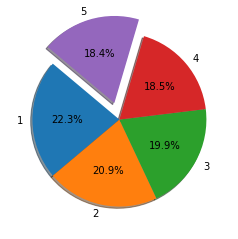

In [80]:
%matplotlib inline
import matplotlib.pyplot as plt

labels = ['1','2','3','4','5']
sizes = df['Overall Rating'].value_counts()
explode = (0,0,0,0,0.2)
plt.pie(sizes, explode=explode, labels=labels,autopct="%1.1f%%", shadow=True, startangle=140)

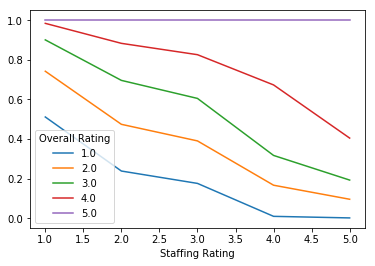

In [81]:
table=pd.crosstab(df['Staffing Rating'],df['Overall Rating'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='line', stacked=True)

In [82]:
# num_bins = 5

# df.hist(bins=num_bins, figsize=(20,15))
# # plt.savefig("snf_histogram_plots")
# plt.show()

In [83]:
# column names that need to be converted to dummy variables for categorical encoding
to_dummify = [
 'Ownership Type',
 'Provider Type',
 'Cited for Abuse']


for dummy in to_dummify:
    df = pd.concat([df.drop(dummy, axis=1), pd.get_dummies(df[dummy], drop_first=True,
                prefix=dummy)], axis=1)
df.head()

,Number of Certified Beds,Average Number of Residents Per Day,Overall Rating,Health Inspection Rating,QM Rating,Long-Stay QM Rating,Short-Stay QM Rating,Staffing Rating,RN Staffing Rating,Reported Nurse Aide Staffing Hours per Resident per Day,...,Ownership Type_Government - City/county,Ownership Type_Government - County,Ownership Type_Government - Federal,Ownership Type_Government - Hospital district,Ownership Type_Government - State,Ownership Type_Non profit - Church related,Ownership Type_Non profit - Corporation,Ownership Type_Non profit - Other,Provider Type_Medicare and Medicaid,Cited for Abuse_True
1,100,78.9,5.0,5.0,4.0,3.0,5.0,3.0,3.0,2.62088,...,0,0,0,0,0,0,0,0,1,0
4,79,78.2,5.0,5.0,5.0,5.0,3.0,2.0,1.0,2.38684,...,0,0,0,0,0,0,0,0,1,0
5,50,38.8,2.0,1.0,4.0,5.0,1.0,4.0,3.0,2.58972,...,0,0,0,0,0,0,0,0,1,1
6,72,54.2,4.0,4.0,4.0,4.0,3.0,3.0,2.0,2.77276,...,0,0,0,0,0,0,0,0,1,0
7,134,128.1,4.0,3.0,5.0,5.0,5.0,3.0,3.0,2.54910,...,0,0,0,0,0,0,0,0,1,0


In [66]:
# df.where(df == '.')

In [86]:
df = df.replace('.', np.nan)


In [87]:
df.loc[:, df.dtypes == object]
df = df.apply(pd.to_numeric)
df.head()


,Number of Certified Beds,Average Number of Residents Per Day,Overall Rating,Health Inspection Rating,QM Rating,Long-Stay QM Rating,Short-Stay QM Rating,Staffing Rating,RN Staffing Rating,Reported Nurse Aide Staffing Hours per Resident per Day,...,Ownership Type_Government - City/county,Ownership Type_Government - County,Ownership Type_Government - Federal,Ownership Type_Government - Hospital district,Ownership Type_Government - State,Ownership Type_Non profit - Church related,Ownership Type_Non profit - Corporation,Ownership Type_Non profit - Other,Provider Type_Medicare and Medicaid,Cited for Abuse_True
1,100,78.9,5.0,5.0,4.0,3.0,5.0,3.0,3.0,2.62088,...,0,0,0,0,0,0,0,0,1,0
4,79,78.2,5.0,5.0,5.0,5.0,3.0,2.0,1.0,2.38684,...,0,0,0,0,0,0,0,0,1,0
5,50,38.8,2.0,1.0,4.0,5.0,1.0,4.0,3.0,2.58972,...,0,0,0,0,0,0,0,0,1,1
6,72,54.2,4.0,4.0,4.0,4.0,3.0,3.0,2.0,2.77276,...,0,0,0,0,0,0,0,0,1,0
7,134,128.1,4.0,3.0,5.0,5.0,5.0,3.0,3.0,2.54910,...,0,0,0,0,0,0,0,0,1,0


In [88]:
df['Number of Certified Beds'].dtype

dtype('int64')

In [93]:
X = df.drop('Cited for Abuse_True', axis=1)

# save column names of X to a list for later use
feature_names = X.columns.tolist()
# feature_names

In [90]:
# Convert X, y to arrays
X = df.drop('Cited for Abuse_True', axis=1).values
y = df['Cited for Abuse_True'].values
print(X.shape, y.shape)

(12929, 64) (12929,)


In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                    random_state=1, stratify=y)

In [92]:
# Create a StandardScater model and fit it to the training data
X_scaler = MinMaxScaler().fit(X_train)
# Transform the training and testing data using the X_scaler
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
# Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

y_train_categorical = to_categorical(encoded_y_train, dtype=int)
y_test_categorical = to_categorical(encoded_y_test, dtype=int)
